In [31]:
import sys
import os
import lxml.etree as ET 
import matplotlib.pyplot as plt

In [32]:
def getDataFromFileRRT(filePath: str) -> tuple:
    tree = ET.parse(filePath)
    root = tree.getroot()
    time = float(root.find('time').text)
    # countOfEdges = int(root.find('countofedges').text)
    distance = float(root.find('distance').text)
    return (time, distance)
    

In [33]:
def getDataFromFileAstar(filePath: str) -> tuple:
    tree = ET.parse(filePath)
    root = tree.getroot()
    log = root.find('log')
    summary = log.find('summary')
    time = float(summary.get('time'))
    
    distance = float(summary.get('length'))
    return (time, distance)



In [34]:
def getAllData(folder: str) -> tuple:
    RRTData = []
    for file in os.listdir(os.path.join(folder, 'RRT')):
        RRTData.append(getDataFromFileRRT(os.path.join(folder, 'RRT', file)))
    AstarData = []
    for file in os.listdir(os.path.join(folder, 'Astar')):
        AstarData.append(getDataFromFileAstar(os.path.join(folder, 'Astar', file)))
    return (RRTData, AstarData)

In [122]:
def drawData(data: list):
    dataRRT = data[0]
    dataAstar = data[1]
    timeRRT = [e[0] for e in dataRRT]
    timeAstar = [e[0] for e in dataAstar]
    distanceRRT = [e[1] for e in dataRRT]
    distanceAstar = [e[1] for e in dataAstar]
    print('Time:')
    width = 1
    fig, ax = plt.subplots()
    rects1 = ax.bar([(i - width / 2) for i in range(len(timeRRT))], timeRRT, width=width, facecolor='#9999ff', label='RRT')
    rects2 = ax.bar([(i + width / 2) for i in range(len(timeAstar))], timeAstar, width=width, facecolor='#ff9999', label='A*')
    ax.set_ylabel('Time in seconds')
    ax.set_title('Time')
    # ax.set_xticklabels([i + 1 for i in range(len(timeRRT))])
    ax.legend()
    fig.tight_layout()
    plt.show()
    print(f'Average running time RRT: {sum(timeRRT) / len(timeRRT)}.')
    print(f'Median RRT: {sorted(timeRRT)[len(timeRRT) // 2] if len(timeRRT) % 2 == 0 else (sorted(timeRRT)[len(timeRRT) // 2] + sorted(timeRRT)[len(timeRRT) // 2 + 1]) / 2}')
    print()
    # print('Distance:')
    # plt.bar([i for i in range(1, len(distanceRRT) + 1)], distanceRRT)
    # plt.show()


# Moscow102401

Time:


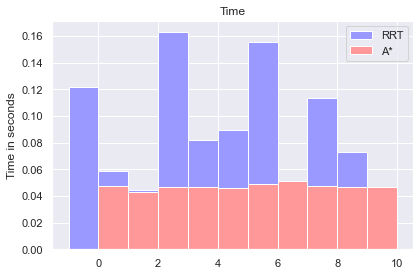

Average running time RRT: 0.09459730000000001.
Median RRT: 0.089398



In [123]:
path = 'D:/Projects/PathPlanningAlgorithms-RRT-RRTstar-/tests/analysis/moscow102401'
data = getAllData(path)
dataRRT = data[0]
dataAstar = data[1]
sns.set_theme()
drawData(data)

